In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic_df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Seems there are records with people that pay 0 fare. We investigate to know if it's missing by random or on purpose.

In [6]:
titanic_df[titanic_df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [7]:
# lets drop these columns

indexes = titanic_df[titanic_df.Fare == 0].index
titanic_df.drop(index=indexes, inplace=True)

The cabin column has a lot of missing values, we can drop this as well

In [8]:
titanic_df.drop(columns=["Cabin"], inplace=True)

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,876.000000,876.000000,876.000000,707.000000,876.000000,876.000000,876.000000
mean,444.794521,0.389269,2.315068,29.645219,0.531963,0.388128,32.755650
std,257.806393,0.487863,0.835663,14.558872,1.110009,0.811374,49.936826
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,220.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,444.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,667.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df.duplicated().any()

False

## EDA

In [11]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

params = {
    'figure.figsize': [10, 6],
    'axes.titlesize': 16,
    'axes.labelsize': 14
}

matplotlib.rcParams.update(params)

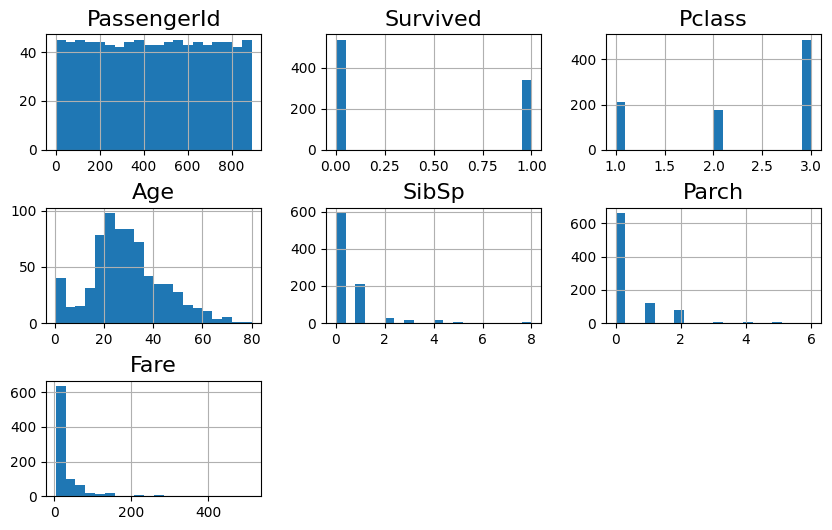

In [12]:
titanic_df.hist(bins=20)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [13]:
numeric_features = titanic_df.select_dtypes(include=np.number).columns.tolist()[2:] # remove passengerId and target label
cat_features = titanic_df.select_dtypes("object").columns.tolist()[1:]

cat_features.remove("Ticket")

In [14]:
print("Numeric Features: ", numeric_features)
print("Categorical Features: ", cat_features)

Numeric Features:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Features:  ['Sex', 'Embarked']


In [15]:
# View Value counts in categorical variables

for val in cat_features:
    print(titanic_df[val].value_counts())
    print("*" * 10)

Sex
male      562
female    314
Name: count, dtype: int64
**********
Embarked
S    629
C    168
Q     77
Name: count, dtype: int64
**********


In [16]:
fig = px.histogram(titanic_df, x="Age", color="Survived")
fig.update_layout(barmode="overlay")
fig.show()

We can see generally that across the histogram, most young people (in this case children) survived while most adults especially between the ages of 16 to 50 didn't survive.

<Axes: xlabel='Pclass', ylabel='Fare'>

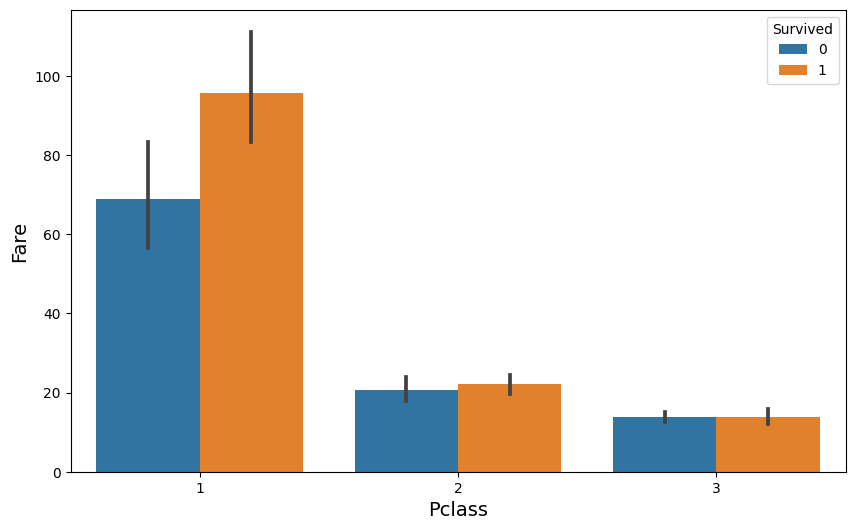

In [17]:
sns.barplot(titanic_df, x="Pclass", y="Fare", hue="Survived")